In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

We can either organise our data by putting it in our working directory, or if we have a lot of files we can put them in their own directory on our disk.


In [369]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_original.csv")
#print(data_path)

flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu','flu_jab','flu_symptoms'])

flu_df.date = pd.to_datetime(flu_df.date)

data_cols = flu_df.columns[flu_df.columns != 'date']

flu_df[data_cols] = flu_df[data_cols].replace('<1','0').astype('float64')

flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          261 non-null    datetime64[ns]
 1   flu           261 non-null    float64       
 2   flu_jab       261 non-null    float64       
 3   flu_symptoms  261 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.3 KB


In [370]:
#flu_df = flu_df.replace('<1','1')

#flu_df.flu = pd.to_numeric(flu_df.flu)
#flu_df.flu_jab = pd.to_numeric(flu_df.flu_jab)
#flu_df.flu_symptoms = pd.to_numeric(flu_df.flu_symptoms)

#flu_df.date = pd.to_datetime(flu_df.date)
#flu_df.info()

In [371]:
flu_df['flu_norm'] = flu_df['flu']/flu_df['flu'].max()
flu_df['flu_jab_norm'] = flu_df['flu_jab']/flu_df['flu_jab'].max()
flu_df['flu_symptoms_norm'] = flu_df['flu_symptoms']/flu_df['flu_symptoms'].max()

Text(0, 0.5, 'Search volume')

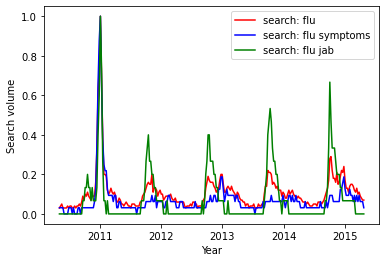

In [372]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(flu_df.date, flu_df.flu_norm, 'r', label="search: flu")
ax.plot(flu_df.date, flu_df.flu_symptoms_norm, 'b',label="search: flu symptoms")
ax.plot(flu_df.date, flu_df.flu_jab_norm, 'g',label="search: flu jab")

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Search volume")

<AxesSubplot:xlabel='date'>

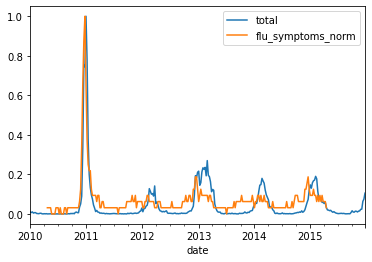

In [373]:
data_path = os.path.join("data", "who_flunet_uk_original.csv")
#print(data_path)

# if "whodata.csv" is in the same directory use
# who_df = pd.read_csv("whodata.csv")


#who_df.columns.to_list()

colnames = [ 'a_h5_label', 'year', 'week', 'a_h5',
          'a_h1_label', 'a_h1',
          'a_h1n1_label', 'a_h1n1',
           'a_h3_label', 'a_h3',
          'a_notsubtyped_label', 'a_notsubtyped',
          'b_yamagata_label', 'b_yamagata',
          'b_victoria_label', 'b_victoria',
          'b_notdetermined_label', 'b_notdetermined' ]

who_df = pd.read_csv(data_path, skiprows=4, names= colnames) 

date_vals = []

for i in range(len(who_df)):
    year = who_df.year[i]
    week_num = who_df.week[i]
    entry_date = pd.Timestamp.fromisocalendar(year,week_num,1)
    date_vals.append(entry_date)

who_df['date']=date_vals   

who_df = who_df[( who_df.year >= 2010) & (who_df.year <= 2015 )]


col_selection = [ 'date', 'a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped',
                  'b_yamagata','b_victoria','b_notdetermined' ]

who_df = who_df[col_selection]

a_cols = ['a_h5','a_h1','a_h1n1','a_h3','a_notsubtyped']
b_cols = ['b_yamagata','b_victoria','b_notdetermined']

who_df['total_a'] = who_df[a_cols].sum(axis=1)
who_df['total_b'] = who_df[b_cols].sum(axis=1)
who_df['total'] = who_df['total_a'] + who_df['total_b']

who_df['total'] = who_df['total']/who_df['total'].max()

ax = who_df.plot(x='date', y='total')
flu_df.plot(x='date', y='flu_symptoms_norm', ax=ax)

In [374]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_flu.csv")
#print(data_path)

flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu'])

flu_df.date = pd.to_datetime(flu_df.date)

data_cols = flu_df.columns[flu_df.columns != 'date']

flu_df[data_cols] = flu_df[data_cols].replace('<1','0').astype('float64')

for col in data_cols:
    flu_df[col] = flu_df[col]/flu_df[col].max()
    
flu_df

,date,flu
0,2010-05-02,0.06
1,2010-05-09,0.06
2,2010-05-16,0.07
3,2010-05-23,0.06
4,2010-05-30,0.05
...,...,...
256,2015-03-29,0.11
257,2015-04-05,0.09
258,2015-04-12,0.08
259,2015-04-19,0.08


In [375]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_flu_jab.csv")
#print(data_path)

flu_jab_df = None
flu_jab_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu_jab'])

flu_jab_df.date = pd.to_datetime(flu_jab_df.date)

data_cols = flu_jab_df.columns[flu_jab_df.columns != 'date']

flu_jab_df[data_cols] = flu_jab_df[data_cols].replace('<1','0').astype('float64')

for col in data_cols:
    flu_jab_df[col] = flu_jab_df[col]/flu_jab_df[col].max()
    
flu_df['flu_jab'] = flu_jab_df['flu_jab']
flu_df

,date,flu,flu_jab
0,2010-05-02,0.06,0.00
1,2010-05-09,0.06,0.01
2,2010-05-16,0.07,0.00
3,2010-05-23,0.06,0.01
4,2010-05-30,0.05,0.00
...,...,...,...
256,2015-03-29,0.11,0.01
257,2015-04-05,0.09,0.00
258,2015-04-12,0.08,0.01
259,2015-04-19,0.08,0.01


In [376]:
# https://trends.google.com/trends/explore?date=2010-05-01%202015-05-01&geo=GB&q=flu,flu%20jab,flu%20symptoms
data_path = os.path.join("data", "google_trends_flu_symptoms.csv")
#print(data_path)

flu_symptoms_df = None
flu_symptoms_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['date','flu_symptoms'])

flu_symptoms_df.date = pd.to_datetime(flu_symptoms_df.date)

data_cols = flu_symptoms_df.columns[flu_symptoms_df.columns != 'date']

flu_symptoms_df[data_cols] = flu_symptoms_df[data_cols].replace('<1','0').astype('float64')

for col in data_cols:
    flu_symptoms_df[col] = flu_symptoms_df[col]/flu_symptoms_df[col].max()
    
flu_df['flu_symptoms'] = flu_symptoms_df['flu_symptoms']
flu_df

,date,flu,flu_jab,flu_symptoms
0,2010-05-02,0.06,0.00,0.02
1,2010-05-09,0.06,0.01,0.04
2,2010-05-16,0.07,0.00,0.05
3,2010-05-23,0.06,0.01,0.06
4,2010-05-30,0.05,0.00,0.01
...,...,...,...,...
256,2015-03-29,0.11,0.01,0.08
257,2015-04-05,0.09,0.00,0.09
258,2015-04-12,0.08,0.01,0.06
259,2015-04-19,0.08,0.01,0.07


<AxesSubplot:xlabel='date'>

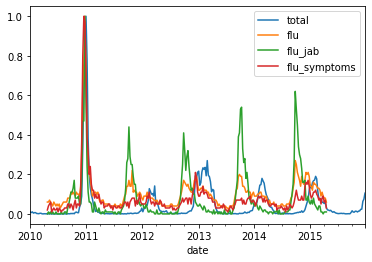

In [377]:

ax = who_df.plot(x='date', y='total')
flu_df.plot(x='date', y=['flu','flu_jab','flu_symptoms'], ax=ax)

In [381]:
start_date = flu_df.iloc[0].date
end_date = flu_df.iloc[-1].date

date_index = pd.date_range(start=start_date, end=end_date, freq='w')
flu_df.index = date_index


row_selection = (who_df['date'] >= start_date) & (who_df['date'] <= end_date)
who_df = who_df[row_selection]

who_df.index = date_index[:-1]

In [385]:
pd.concat(obj=[flu_df.iloc[:-1], who_df], axis=1 )

TypeError: concat() got an unexpected keyword argument 'obj'

In [357]:
who_df[row_selection].date

800    2010-05-03
801    2010-05-10
802    2010-05-17
803    2010-05-24
804    2010-05-31
          ...    
1055   2015-03-23
1056   2015-03-30
1057   2015-04-06
1058   2015-04-13
1059   2015-04-20
Name: date, Length: 260, dtype: datetime64[ns]

In [358]:
len(combined_df), len(who_df[row_selection].total.values)

(260, 260)

/Users/plewis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


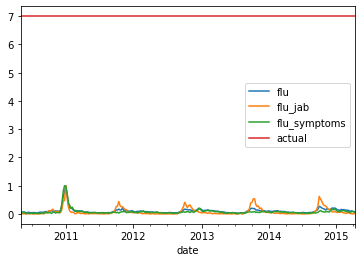

In [359]:
combined_df.loc[:,'actual'] = 7

data_cols = combined_df.columns[combined_df.columns != 'date']

ax = combined_df.plot(x='date', y=data_cols)